# 1. 단항 논리 회귀 Logistic Regression 실습
* 분류를 할 때 사용하며 선형 회귀 공식으로부터 나왔기 때문에 논리 회귀라는 이름이 붙여짐

<img src='https://i.imgur.com/nE29yVL.png' width=600>

> 직선 하나(선형 회귀)를 사용해서 분류를 예측한다면 제대로 예측하지 못할 경우가 많음

<img src='https://i.imgur.com/guvMfkf.png', width=600>

> Sigmoid 함수 (Logistic 함수)를 사용하여 정확도를 높일 수 있음

### 1-1. Sigmoid function 시그모이드 함수
* 예측값을 0에서 1사이의 값이 되도록 만듦
* 0에서 1사이의 연속된 값을 출력으로 하기 때문에 0.5를 기준으로 구분
* 0.5가 보통 threshold이지만, 이 값은 설정을 통해 바꿀 수 있음

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

torch.manual_seed(2023)

In [ ]:
x_train = torch.FloatTensor([[0], [1], [3], [5], [9], [11], [15], [20]])
y_train = torch.FloatTensor([[0], [0], [0], [0], [0], [1], [1], [1]])

print(x_train.shape)
print(y_train.shape)

torch.Size([8, 1])
torch.Size([8, 1])


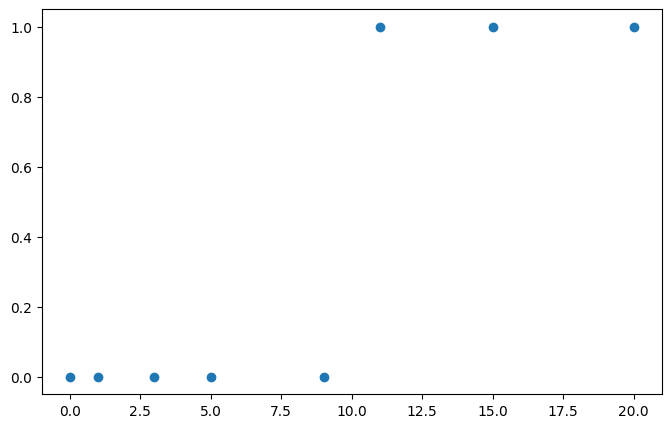

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(x_train, y_train)

![](https://i.imgur.com/6NsfKMa.png)

In [ ]:
model = nn.Sequential(
    nn.Linear(1, 1),
    nn.Sigmoid()  # between 0 and 1 으로 만들어주는 함수
)

print(model)

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): Sigmoid()
)


In [ ]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.1420]], requires_grad=True), Parameter containing:
tensor([0.4401], requires_grad=True)]


### 1-2. cost function 비용 함수
* 논리 회귀에서는 nn.BCELoss() 함수를 사용하여 Loss를 계산
* Binary Cross Entropy (BCE)

<img src='https://i.imgur.com/tvCuEmh.png' width='400'>

In [ ]:
y_pred = model(x_train)
y_pred

tensor([[0.6083],
        [0.5740],
        [0.5035],
        [0.4330],
        [0.3020],
        [0.2457],
        [0.1558],
        [0.0832]], grad_fn=<SigmoidBackward0>)

In [ ]:
loss = nn.BCELoss()(y_pred, y_train)
loss
# 위의 y_train과 현재의 y_pred에 대한 오차값 평균

tensor(1.1459, grad_fn=<BinaryCrossEntropyBackward0>)

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.01)


In [ ]:
epochs = 1000

for epoch in range(epochs + 1):
  y_pred = model(x_train)
  loss = nn.BCELoss()(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print(f'Epoch: {epoch}/{epochs} Loss: {loss:6f}')

Epoch: 0/1000 Loss: 0.995083
Epoch: 100/1000 Loss: 0.677194
Epoch: 200/1000 Loss: 0.609379
Epoch: 300/1000 Loss: 0.553435
Epoch: 400/1000 Loss: 0.507153
Epoch: 500/1000 Loss: 0.468642
Epoch: 600/1000 Loss: 0.436357
Epoch: 700/1000 Loss: 0.409060
Epoch: 800/1000 Loss: 0.385779
Epoch: 900/1000 Loss: 0.365750
Epoch: 1000/1000 Loss: 0.348375


In [ ]:
x_test = torch.FloatTensor([[12]])
y_pred = model(x_test)
print(y_pred)

tensor([[0.7042]], grad_fn=<SigmoidBackward0>)


In [ ]:
# 임계치 threshold 설정하기
# 0.5보다 크거나 같으면 1
# 0.5보다 작으면 0
y_bool = (y_pred >= 0.5).float()
print(y_bool)

tensor([[1.]])


# 2. 다항 논리 회귀 실습 Multinomial/multiple Logistic Regression

In [ ]:
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]

y_train = [0, 0, 0, 1, 1, 1, 2, 2]

x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

print(x_train.shape)
print(y_train.shape)

torch.Size([8, 4])
torch.Size([8])


In [ ]:
model = nn.Sequential(
    # softmax라는 함수를 사용
    nn.Linear(4, 3) # output은 클래스의 갯수만큼 나옴
)

print(model)

Sequential(
  (0): Linear(in_features=4, out_features=3, bias=True)
)


In [ ]:
y_pred = model(x_train)
print(y_pred)

tensor([[ 0.6316, -0.2246, -0.1046],
        [ 0.4883, -0.2910, -1.2265],
        [ 1.6158,  0.5575, -1.2952],
        [ 1.4759,  0.3449, -2.2169],
        [ 0.1031, -0.1740, -1.5059],
        [ 0.4176,  1.0407, -2.6224],
        [-0.0367,  0.1675, -2.3065],
        [-0.1697,  0.2166, -2.7068]], grad_fn=<AddmmBackward0>)


In [ ]:
# 다항 논리 회귀에서는 BCELoss() 대신 CrossEntropyLoss()를 사용
# softmax 함수가 포함
# array / vector로 각각의 숫자가 나오는데, 그중 가장 높은 값이 채택 됨
# prediction 값은 index 번호에 따라감
loss = nn.CrossEntropyLoss()(y_pred, y_train)
print(loss)

tensor(1.3611, grad_fn=<NllLossBackward0>)


In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [ ]:
epochs = 1000

for epoch in range(epochs + 1):
  y_pred = model(x_train)
  loss = nn.CrossEntropyLoss()(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print(f'Epoch: {epoch}/{epochs} Loss: {loss:6f}')

Epoch: 0/1000 Loss: 1.361070
Epoch: 100/1000 Loss: 0.633233
Epoch: 200/1000 Loss: 0.553345
Epoch: 300/1000 Loss: 0.500032
Epoch: 400/1000 Loss: 0.456274
Epoch: 500/1000 Loss: 0.417167
Epoch: 600/1000 Loss: 0.380426
Epoch: 700/1000 Loss: 0.344560
Epoch: 800/1000 Loss: 0.308444
Epoch: 900/1000 Loss: 0.271863
Epoch: 1000/1000 Loss: 0.242870


In [ ]:
x_test = torch.FloatTensor([[1, 6, 7, 7]])
y_pred = model(x_test)
print(y_pred)

# []가 몇개가 있느냐에 따라 차원이 달라짐. 현재는 2차원

tensor([[-8.2174,  1.7220,  3.7782]], grad_fn=<AddmmBackward0>)


In [ ]:
y_prob = nn.Softmax(1)(y_pred) # 1은 dimension을 이야기 함 , 우리가 필요한 dimesion은 1차원
print(y_prob)

tensor([[5.4716e-06, 1.1343e-01, 8.8657e-01]], grad_fn=<SoftmaxBackward0>)


In [ ]:
print(f'0일 확률: {y_prob[0][0]:2f}')
print(f'1일 확률: {y_prob[0][1]:2f}')
print(f'2일 확률: {y_prob[0][2]:2f}')

0일 확률: 0.000005
1일 확률: 0.113427
2일 확률: 0.886568


In [ ]:
torch.argmax(y_prob, axis=1) # column안에서 max인 값을 구하고, index를 출력

tensor([2])

# 3. 경사하강법

### 3-1.

### 3-2. 확률적 경사 하강법
* 확률적 경사 하강법 Stochastic Gradient Descent은 배치 경사 하강법이 모델 학습 시 많은 시간과 메모리가 필요하다는 단점을 개선하기 위해 제안된 기법
* Batch Size를 1로 설정하여 파라미터를 업데이트 하기 때문에 배치 경사 하강법보다 훨씬 빠르고 적은 메모리로 학습이 진행
* 파라미터 값의 업데이트 폭이 불안정하기 때문에 정확도가 낮은 경우가 생길 수 있음

### 3-3. 미니 배치 경사 하강법
* 미니 배치 경사 하강법 (Mini-Batch Gradient)은 Batch size를 설정한 size로 사용
* 배치 경사 하강법보다 모델 학습 속도가 빠르고, 확률적 경사 하강법 보다 안정적인 장점이 있음
* 딥러닝 분야에서 가장 많이 활용되는 경사 하강법
* 일반적인 Batch Size를 16, 32, 64, 128과 같이 2의 n제곱에 해당하는 값으로 사용하는게 보편적

# 4. 경사하강법의 여러가지 알고리즘

### 4-1. 확률적 경사 하강법 (SGD)
* 매개변수 값을 조정 시 전체 데이터가 아니라 랜덤으로 선책한 하나의 데이터에 대해서만 계산하는 방법

### 4-2. 모멘텀 (Momentum)
* 관성이라는 물리학의 법칙을 응용한 방법
* 경사 하강법에 관성을 더해줌
* 접선의 기울기에 한 시점 이전의 접선의 기울기값을 일정한 비율만큼 반영

### 4-3. 아다가르다 Adagrad
* 모든 매개변수에 동일한 학습률 (learning rate)을 적용하는 것은 비효율적이라는 생각에서 만들어진 학습 방법
* 처음하는 크게 학습하다가 조금씩 작게 학습시킴

### 4-4. 아담 Ada
* 모멘텀 + 아다그리드

### 4-5. AdamW
* Adam Optimizer의 변형
* Adam의 일부 약점 (가중치 감쇠)와 성능 향상을 위해 고안

# 5. 와인 품종 예측해보기
* sklearn.datasets.load_wine: 이탈리아의 같은 지역게서 재배된 세가지 다른 품종으로 만든 와인을 화학적으로 분석한 결과에 대한 데이터셋

In [52]:
from sklearn.datasets import load_wine

In [53]:
x_data, y_data = load_wine(return_X_y=True, as_frame=True)

In [54]:
x_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [55]:
y_data.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

### 5-1. 문제
* 13개의 성분을 분석하여 어떤 와인인지 맞춰보는 딥러닝 모델을 구축해보자
* 단, 데이터를 섞은 후 train 데이터를 80% test 데이터를 20%로 하여 테스트 데이터의 0번 인덱스가 어떤 와인인지 출력하고 정확도롤 출력해보자 (Adam 사용)

In [56]:
x_data = torch.FloatTensor(x_data.values)
y_data = torch.LongTensor(y_data.values)

print(x_data.shape)
print(y_data.shape)

torch.Size([178, 13])
torch.Size([178])


In [57]:
from sklearn.model_selection import train_test_split

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state=200)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

torch.Size([142, 13]) torch.Size([142])
torch.Size([36, 13]) torch.Size([36])


In [60]:
model = nn.Sequential(
    nn.Linear(13,3)
)

optimizer = optim.Adam(model.parameters(), lr= 0.01)

epochs = 1000

for epoch in range(epochs + 1):
  y_pred = model(x_train)
  loss = nn.CrossEntropyLoss()(y_pred, y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch % 100 == 0:
    y_prob = nn.Softmax(1)(y_pred)
    y_pred_index = torch.argmax(y_prob, axis=1)
    y_train_index = y_train
    accuracy = (y_train_index == y_pred_index).float().sum() / len(y_train) * 100
    print(f'Epoch {epoch:4d}/{epochs} Loss:{loss:.6f} Accuracy:{accuracy:2f}%')






Epoch    0/1000 Loss:163.132462 Accuracy:40.845070%
Epoch  100/1000 Loss:0.472397 Accuracy:86.619720%
Epoch  200/1000 Loss:0.287839 Accuracy:88.732391%
Epoch  300/1000 Loss:0.192155 Accuracy:92.957748%
Epoch  400/1000 Loss:0.154286 Accuracy:95.774651%
Epoch  500/1000 Loss:0.135440 Accuracy:97.183098%
Epoch  600/1000 Loss:0.123443 Accuracy:97.183098%
Epoch  700/1000 Loss:0.114607 Accuracy:97.183098%
Epoch  800/1000 Loss:0.107499 Accuracy:97.183098%
Epoch  900/1000 Loss:0.101474 Accuracy:97.183098%
Epoch 1000/1000 Loss:0.096192 Accuracy:97.887329%


In [61]:
y_pred = model(x_test)
y_pred[:10]

tensor([[ -57.5823,  -53.8115,  -58.5414],
        [ -91.8473,  -95.0991,  -99.3524],
        [ -58.8388,  -59.4308,  -51.9921],
        [ -54.2284,  -55.0093,  -44.7437],
        [ -68.9670,  -70.4381,  -60.6105],
        [ -89.9540,  -91.4847,  -87.8196],
        [ -84.3603,  -86.3136,  -82.1022],
        [ -41.8681,  -35.4782,  -42.4857],
        [-105.7372, -112.6063, -113.1128],
        [-166.0661, -183.6279, -180.7790]], grad_fn=<SliceBackward0>)

In [62]:
print(f'0일 확률: {y_prob[0][0]:2f}')
print(f'1일 확률: {y_prob[0][1]:2f}')
print(f'2일 확률: {y_prob[0][2]:2f}')

0일 확률: 0.009022
1일 확률: 0.008701
2일 확률: 0.982277


In [63]:
y_pred_index = torch.argmax(y_prob, axis=1)
accuracy = (y_test == y_pred_index).float().sum() / len(y_test) * 100

print(f'테스트 정확도는 {accuracy:.2f}% 입니다')

RuntimeError: ignored